<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Carlos Lucio  <br>
Fecha: 18/07/2022

# Importación de librerias necesarias

In [63]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Importar la libreria statsmodels
import statsmodels.api as smi
#Importamos la libreria necesaria para la regresión lineal
from sklearn.linear_model import LinearRegression 
#Importar la libreria que permite realizar la grafica
import matplotlib.pyplot as plt

## Cargar el Dataset

In [85]:
'''
Método que permite cargar el dataset 
Parámetros:
    csv: Variable que permite guardar el registro del dataset
    pd: Variable referente a la libreria pandas
Retorna:
    Nada
'''
#Cargar el dataset
csv = pd.read_csv('Real_estate.csv')

In [86]:
'''
Función head() que permite mostrar los 5 primeros datos por defecto

    Parámetros:
        n=Cantidad de registros a mostrar
    Retorna:
        Los resultados del dataset

'''
#Mostrar los registros del dataset
csv.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [87]:
#Aplicacion del describe para el dataset
csv.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Descripción de la fuente del Dataset

In [88]:
'''
Función info() que permite mostrar la información del dataset
    Parámetros:
        csv=Variable que almacena la carga de datos del dataset
    Retorna:
        Información de la base de datos
'''
#Mostrar la información de dataset
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


***Descripción***

Por medio de la función info se puede obtener la información del dataset el cual tiene 414 registros los cuales representan a diferentes caracteristicas sobre una casa. El dataset cuenta con 8 campos donde se puede tomar como variable objetivo **(Y house price of unit area)** y como variables de entrada:

**Variables de entrada X** Variable Independiente

**-->No:** Representa el numero de la casa(Variable Continua)

**-->X1 transaction date:** Representa la fecha de compra (Variable continua)

**-->X2 house age:** Representa la edad que tiene el establecimiento (Variable Continua)

**-->X3 distance to the nearest MRT station:** Representa la distancia a la estación MRT más cercana (Variable Continua)

**-->X4 number of convenience stores:** número de tiendas de conveniencia (Variable Continua)

**-->X5 latitude:** Latitud (Variable continua)

**-->X6 longitude:** Longitud (Variable continua)


**Variable de salida Y** Variable Dependiente

**-->Y house price of unit area:** precio de la casa por unidad de área

## Explique el problema a resolver. 
El dataset muestra los diferentes datos que tiene un asegurado en donde el objetivo principal es predecir con precisión el gasto que conlleva en salud el valor del seguro como tal. Para su solución se emplea generar la regresión lineal tomando valores de entrada y un valor objetivo

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

**Número de instancias en total**

In [89]:
#Código que responde a la descripción anterior
#Número de instancias en total
csv.count()

No                                        414
X1 transaction date                       414
X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64

**Número de atributos de entrada, su significado y tipo**


**-->Age:** Representa la edad (Variable Continua), Tipo de dato: int64 

**-->Sex:** Representa el sexo del médico (Variable categórica), Tipo de dato: object

**-->BMI:** Representa el índice de masa corporal, que proporciona una comprensión del cuerpo, pesos que son relativamente altos o bajos en relación con la altura (Variable Continua), Tipo de dato: float64

**-->Children:** Número de niños cubiertos por el seguro de salud / Número de dependientes (Variable Continua), Tipo de dato: int64

**-->Smoker:** Fuma (Variable Categórica), Tipo de Dato: object

**-->Region:** el área residencial del beneficiario en los EE. UU., noreste, sureste, suroeste, noroeste (Variable categorica), Tipo de dato: object

In [90]:
#muestra la información (incluido el tipo de dato) de los 6 atributos de entrada.
csv.drop('Y house price of unit area', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


**Estadísticas de la Variable objetivo**


Ya que vamos a programar un modelo de regresión, nos vamos asegurar de que el histograma se vea como una curva de campana o una versión levemente sesgada de la misma. De lo contrario, afecta la capacidad de los algoritmos de aprendizaje automático para aprender todos los escenarios.


<AxesSubplot:>

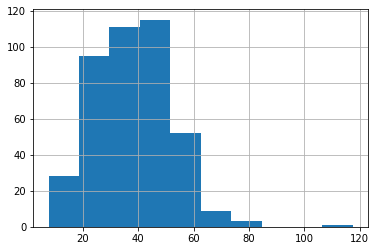

In [91]:
#Importación de la funcion matpolib inline que permite graficar una única sección
%matplotlib inline
#Crear gráfico de barras como la variable objetivo (tipo) continua.
csv['Y house price of unit area'].hist()

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [100]:
#Transformación de las caracteristicas
# Variable objetivo y variables de entrada
VariablesEntrada=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
VariableObjetivo=['Y house price of unit area']
X=csv[VariablesEntrada]
y=csv[VariableObjetivo]

In [101]:
### Estandarización de la data ###
from sklearn.preprocessing import StandardScaler
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [102]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [103]:
#Generación de los valores estandarizados de X e y
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [104]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
#Divida los datos en un conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
#Comprobación rápida del tamaño de los conjuntos de datos de entrenamiento y prueba
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(289, 6)
(289, 1)
(125, 6)
(125, 1)


## Regresión Lineal

In [106]:
#Código del modelo
#Adaptar el modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [107]:
#Entrenamiento
y_pred=lr.predict(X_test)

In [108]:
#Test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5600638168604302

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 

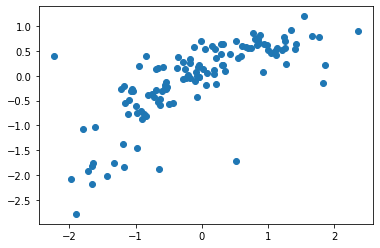

In [109]:
#Construcción de la grafica para visualizar el resultado
plt.scatter(y_test,y_pred)